In [1]:









"""
This file implements a comparison with Gong's method on non-time series simulated data. 
It tests different settings and outputs the results as an error bar plot. 
The parameters used in Gong's method for each setting are obtained based on grid search.
Author: Angus
"""









import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
import pickle
from helper_simulation import *
from itertools import product
from helper_util import *
import numpy as np
import pandas as pd
from comparison import ComparisonGong
import numpy as np
from helper_simulation import *
from datetime import datetime
current_date = datetime.now().strftime("%Y%m%d")

## PARAMS for test
comparison_number=50

comparison_nodes=np.array([50]) #5,9,15,35,
sparcitys=np.array([0.03]) #0.4,0.2,0.1,0.04,
numeberOfData=5000




## PARAMS for this paper
pc_alpha=0.005
quantile=1
## PARAMS for Gongs
## auto-tuning



max_id=get_max("exp_result")
exp_str=""
log_path=f"exp_result/{str(max_id)}.{current_date}.ComparisonGong.log"

logger=get_logger(log_path)
alpha_can = 10**np.linspace(-2, 0, 10)
beta_can = 10**np.linspace(-3, 1, 10)

logger.info(f"pc_alpha: {pc_alpha}")
logger.info(f"quantile: {quantile}")

params = list(product(alpha_can, beta_can))


results={}
for config_i, nodes_number in enumerate(comparison_nodes):
    sparcity=sparcitys[config_i]
    logger.info(f"Start test for {nodes_number} nodes, Sparcity {sparcity}")


    





/home/jianj0c/anaconda3/envs/py3-env/lib/python3.7/site-packages/tigramite/independence_tests/gpdc.py:16: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/home/jianj0c/anaconda3/envs/py3-env/lib/python3.7/site-packages/tigramite/independence_tests/gpdc_torch.py:18: UserWarning: No module named 'dcor'
  warnings.warn(str(e))


exp_result/315.20250325.ComparisonGong.log/xx.log


In [2]:
precision_Matrix,ground_true_graph = generate_markov_network(nodes_number,edge_probability=sparcity)

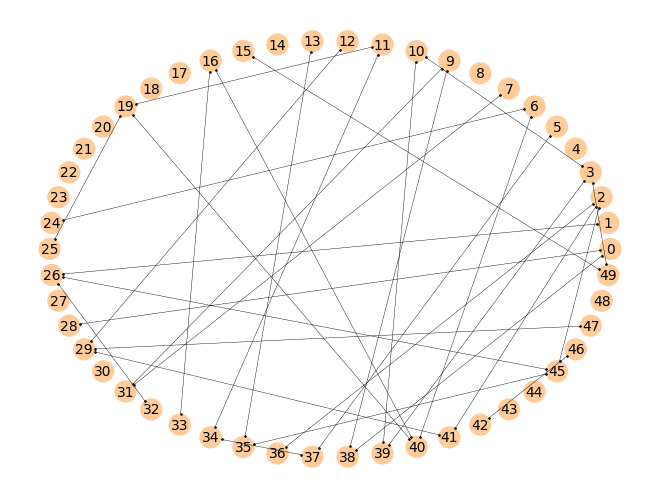

In [3]:
draw_graph(ground_true_graph,node_size=0.1,arrow_linewidth=0.6)

In [4]:

tpdm=np.linalg.inv(precision_Matrix)
weights=np.linalg.cholesky(tpdm)

In [12]:
numeberOfData=50000
N_data=simulation(numeberOfData,nodes_number).T
X_data=otimes(weights.T,N_data,False)
data_df=pd.DataFrame(X_data.T)


In [20]:
resultsthis_paper,_=method_this_paper(data_df,quantile=0.999,pc_alpha=pc_alpha,tau_max=0)
resultsGong=ComparisonGong(data_df,0.01,1.3,0.999)

In [23]:


print(compare_graphs(ground_true_graph,resultsthis_paper,True))
print(compare_graphs(ground_true_graph,resultsGong,True))


(0.15789473684210525, 24)
(0.4, 40)


In [24]:
print((resultsGong!="").sum()/2)
print((resultsthis_paper!="").sum()/2)
print((ground_true_graph!="").sum()/2)

18.0
44.0
32.0


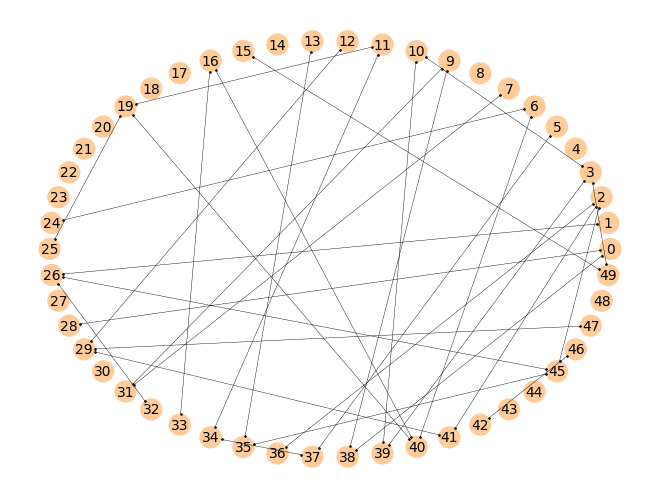

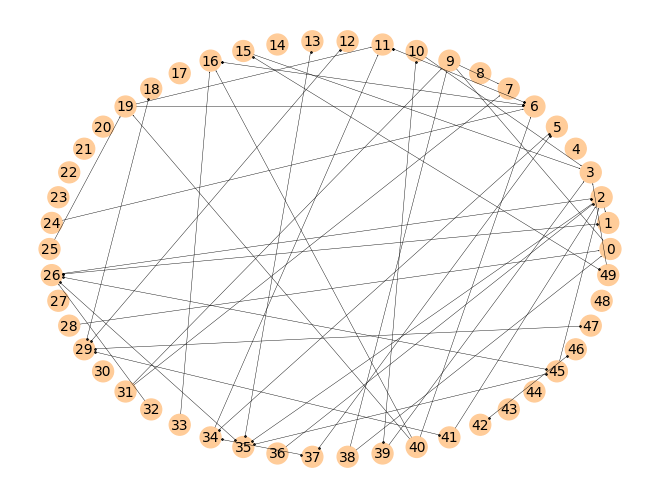

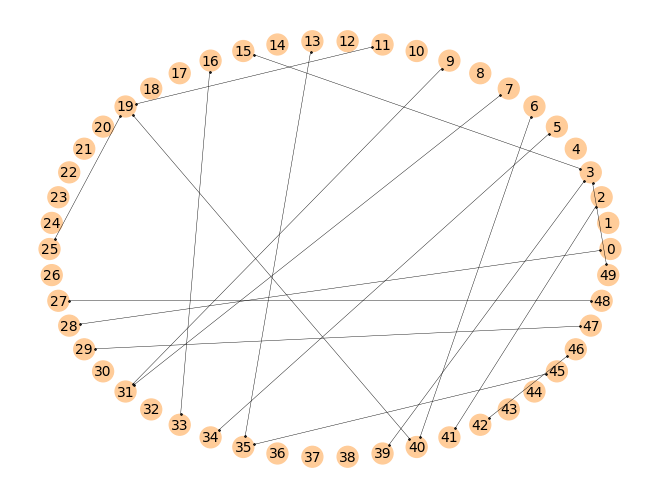

In [25]:
draw_graph(ground_true_graph,node_size=0.1,arrow_linewidth=0.6)

draw_graph(resultsthis_paper,node_size=0.1,arrow_linewidth=0.6)

draw_graph(resultsGong,node_size=0.1,arrow_linewidth=0.6)

In [3]:
49*48*0.03

70.56

In [6]:
import numpy as np
comparison_nodes=np.array([5,9,15,35,50])
sparcitys=np.array([0.4,0.2,0.1,0.04,0.03])

(comparison_nodes-1)*comparison_nodes*sparcitys

array([ 8. , 14.4, 21. , 47.6, 73.5])

In [16]:
150/0.03

5000.0